In [305]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from dtaidistance import dtw
%matplotlib inline

In [306]:
path = os.getcwd()

In [307]:
#paths of the folders where knee flexion and pelvic tilt are stored

In [308]:
path_knee=r'C:\Users\lokes\Downloads\Py-DS-ML-Bootcamp-master\DTW and Classification\knee'
path_pelvic=r'C:\Users\lokes\Downloads\Py-DS-ML-Bootcamp-master\DTW and Classification\pelvic'

In [309]:
#filenames in the folders knee and pelvic are read 

In [310]:
files_knee = os.listdir(path_knee)
files_pelvic = os.listdir(path_knee)
#files = glob.glob(path + "/*.xls")

In [311]:
files_knee_xls=[]
files_pelvic_xls=[]

In [312]:
#filtering the xls files we require

In [313]:
for filename in files_knee:
    if '.xls' in filename:
        #print(filename)
        files_knee_xls.append(filename)

In [314]:
for filename in files_pelvic:
    if '.xls' in filename:
        #print(filename)
        files_pelvic_xls.append(filename)

In [315]:
#finding out the list of people(probands) whose data is availble

In [316]:
probandlist_knee=[]
probandlist_pelvic=[]

In [317]:
for filename in files_knee_xls:
    if filename.split('_')[1]=='RG1.xls':
        proband_name=filename.split('_')[0]
        #print(proband_name)
        probandlist_knee.append(proband_name)

In [318]:
#probandlist_knee

In [319]:
for filename in files_pelvic_xls:
    if filename.split('_')[1]=='RG1.xls':
        proband_name=filename.split('_')[0]
        #print(proband_name)
        probandlist_pelvic.append(proband_name)

In [320]:
path_knee

'C:\\Users\\lokes\\Downloads\\Py-DS-ML-Bootcamp-master\\DTW and Classification\\knee'

In [321]:
#Combining the knee angles of RG1, RG2, CB1, CB3, CB7, WSPL, FG of a person into one common file
#try and catch are used to incase a file is missing to avoid run time errors

In [322]:
for probandname in probandlist_knee:
    try:
        RG1=pd.read_excel(path_knee+'/'+probandname+'_RG1.xls',sheet_name=0,usecols=([1]))
    except:
        RG1=pd.DataFrame([0])
    try:
        RG2=pd.read_excel(path_knee+'/'+probandname+'_RG2.xls',sheet_name=0,usecols=([1]))
    except:
        RG2=pd.DataFrame([0])
    try:
        CB1=pd.read_excel(path_knee+'/'+probandname+'_CB1.xls',sheet_name=0,usecols=([1]))
    except:
        CB1=pd.DataFrame([0])
    try:
        CB3=pd.read_excel(path_knee+'/'+probandname+'_CB3.xls',sheet_name=0,usecols=([1]))
    except:
        CB3=pd.DataFrame([0])
    try:
        CB7=pd.read_excel(path_knee+'/'+probandname+'_CB7.xls',sheet_name=0,usecols=([1]))
    except:
        CB7=pd.DataFrame([0])
    try:
        WSPL=pd.read_excel(path_knee+'/'+probandname+'_WSPL.xls',sheet_name=0,usecols=([1]))
    except:
        WSPL=pd.DataFrame([0])
    try:
        FG=pd.read_excel(path_knee+'/'+probandname+'_FG.xls',sheet_name=0,usecols=([1]))
    except:
        FG=pd.DataFrame([0])
    df=pd.concat([RG1,RG2,CB1,CB3,CB7,WSPL,FG],axis=1)
    df.columns=['RG1','RG2','CB1','CB3','CB7','WSPL','FG']
    probandname=probandname+'.xls'
    df.to_excel(path_knee+'/combined'+'/'+probandname)
    

In [323]:
#Combining the pelvic tilt angles of RG1, RG2, CB1, CB3, CB7, WSPL, FG of a person into one common file
#try and catch are used to incase a file is missing to avoid run time errors

In [324]:
for probandname in probandlist_pelvic:
    try:
        RG1=pd.read_excel(path_pelvic+'/'+probandname+'_RG1.xls',sheet_name=0,usecols=([1]))
    except:
        RG1=pd.DataFrame([0])
    try:
        RG2=pd.read_excel(path_pelvic+'/'+probandname+'_RG2.xls',sheet_name=0,usecols=([1]))
    except:
        RG2=pd.DataFrame([0])
    try:
        CB1=pd.read_excel(path_pelvic+'/'+probandname+'_CB1.xls',sheet_name=0,usecols=([1]))
    except:
        CB1=pd.DataFrame([0])
    try:
        CB3=pd.read_excel(path_pelvic+'/'+probandname+'_CB3.xls',sheet_name=0,usecols=([1]))
    except:
        CB3=pd.DataFrame([0])
    try:
        CB7=pd.read_excel(path_pelvic+'/'+probandname+'_CB7.xls',sheet_name=0,usecols=([1]))
    except:
        CB7=pd.DataFrame([0])
    try:
        WSPL=pd.read_excel(path_pelvic+'/'+probandname+'_WSPL.xls',sheet_name=0,usecols=([1]))
    except:
        WSPL=pd.DataFrame([0])
    try:
        FG=pd.read_excel(path_pelvic+'/'+probandname+'_FG.xls',sheet_name=0,usecols=([1]))
    except:
        FG=pd.DataFrame([0])
    df=pd.concat([RG1,RG2,CB1,CB3,CB7,WSPL,FG],axis=1)
    df.columns=['RG1_pelvic','RG2_pelvic','CB1_pelvic','CB3_pelvic','CB7_pelvic','WSPL_pelvic','FG_pelvic']
    probandname=probandname+'.xls'
    df.to_excel(path_pelvic+'/combined'+'/'+probandname)

In [325]:
Path_merge_files_path_knee=path_knee+'/combined'
Path_merge_files_path_pelvic=path_pelvic+'/combined'

In [326]:
Path_merge_files_path_pelvic

'C:\\Users\\lokes\\Downloads\\Py-DS-ML-Bootcamp-master\\DTW and Classification\\pelvic/combined'

In [327]:
Path_merge_files_knee=os.listdir(Path_merge_files_path_knee)
Path_merge_files_pelvic=os.listdir(Path_merge_files_path_pelvic)

In [328]:
dtw_list_knee=[]
dtw_list_pelvic=[]
column_dtw_knee=['Proband','RG2','CB1','CB3','CB7','WSPL','FG']
column_dtw_pelvic=['Proband','RG2_pelvic','CB1_pelvic','CB3_pelvic','CB7_pelvic','WSPL_pelvic','FG_pelvic']

In [329]:
#calculate the dtw for the combined files of knee

In [330]:
for each_file in Path_merge_files_knee:
    df1=pd.read_excel(Path_merge_files_path_knee+'/'+each_file)
    RG2=dtw.distance(df1['RG1'].fillna(0).values,df1['RG2'].fillna(0).values)
    CB1=dtw.distance(df1['RG1'].fillna(0).values,df1['CB1'].fillna(0).values)
    #print(CB1)
    CB3=dtw.distance(df1['RG1'].fillna(0).values,df1['CB3'].fillna(0).values)
    CB7=dtw.distance(df1['RG1'].fillna(0).values,df1['CB7'].fillna(0).values)
    WSPL=dtw.distance(df1['RG1'].fillna(0).values,df1['WSPL'].fillna(0).values)
    FG=dtw.distance(df1['RG1'].fillna(0).values,df1['FG'].fillna(0).values)
    dtw_list_knee.append([each_file,RG2,CB1,CB3,CB7,WSPL,FG])
    #print(dtw_list)
    

In [331]:
#dtw_list_knee

In [332]:
#calculate the dtw for the combined files of pelvic

In [333]:
for each_file in Path_merge_files_pelvic:
    df1=pd.read_excel(Path_merge_files_path_pelvic+'/'+each_file)
    RG2=dtw.distance(df1['RG1_pelvic'].fillna(0).values,df1['RG2_pelvic'].fillna(0).values)
    CB1=dtw.distance(df1['RG1_pelvic'].fillna(0).values,df1['CB1_pelvic'].fillna(0).values)
    #print(CB1)
    CB3=dtw.distance(df1['RG1_pelvic'].fillna(0).values,df1['CB3_pelvic'].fillna(0).values)
    CB7=dtw.distance(df1['RG1_pelvic'].fillna(0).values,df1['CB7_pelvic'].fillna(0).values)
    WSPL=dtw.distance(df1['RG1_pelvic'].fillna(0).values,df1['WSPL_pelvic'].fillna(0).values)
    FG=dtw.distance(df1['RG1_pelvic'].fillna(0).values,df1['FG_pelvic'].fillna(0).values)
    dtw_list_pelvic.append([each_file,RG2,CB1,CB3,CB7,WSPL,FG])
    #print(dtw_list)

In [334]:
#dtw_list_pelvic

In [335]:
#df1=pd.read_excel(Path_merge_files_path+'/'+'Proband1.xls')

In [336]:
dtw_list_knee1=pd.DataFrame(dtw_list_knee,columns=column_dtw_knee)

In [337]:
dtw_list_pelvic1=pd.DataFrame(dtw_list_pelvic,columns=column_dtw_pelvic)

In [338]:
dtw_list=pd.merge(dtw_list_knee1,dtw_list_pelvic1, on='Proband')

In [339]:
#dtw_list

In [340]:
#dtw_list['Proband'].apply(lambda x: x.split('.')[0])

In [341]:
dtw_list['Proband']=dtw_list['Proband'].apply(lambda x: x.split('.')[0])

In [342]:
classes_file=pd.read_excel('Final_ankel.xlsx',sheet_name=0,usecols=(['Proband','Class']))

In [343]:
#classes_file

In [344]:
dtw_list_class=pd.merge(dtw_list,classes_file,on='Proband')

In [345]:
dtw_list_class.head

<bound method NDFrame.head of         Proband        RG2         CB1         CB3         CB7        WSPL  \
0     Proband10  76.539176   67.953294   95.892224   99.790044   96.986215   
1    Proband100  88.099399   90.461117   82.183417   84.647517   85.029693   
2    Proband103  73.346212   75.014738  109.364625  117.516647  210.062518   
3    Proband104  75.555616  116.778285  102.703585  109.672694  148.374110   
4    Proband105  52.452147   76.893030   70.344719  113.623894  454.727507   
..          ...        ...         ...         ...         ...         ...   
402   Proband93  92.612422   71.461735   39.910240   80.827342  140.436681   
403   Proband94  90.822462   55.231671   81.610140  127.540403  400.725316   
404   Proband95  74.576074  106.991353   66.821575  139.220907   76.096311   
405   Proband96  77.420644  134.404454   64.807476  261.156799   92.870481   
406   Proband97  58.840969   70.854828   70.224075   75.437726  160.892981   

             FG  RG2_pelvic  CB1_

In [346]:
from sklearn.model_selection import train_test_split

In [347]:
path='C:\\Users\\lokes\\Downloads\\Py-DS-ML-Bootcamp-master\\DTW and Classification'

In [348]:
df2=pd.read_excel(path+'/knee/combined/'+'Proband1.xls')

In [349]:
from dtaidistance import dtw_visualisation as dtwvis

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

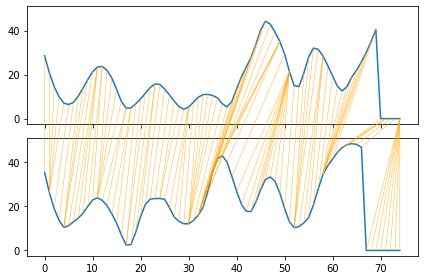

In [350]:
warp = dtw.warping_path(df2['CB1'].fillna(0).values,df2['RG2'].fillna(0).values)
dtwvis.plot_warping(df2['RG1'].fillna(0).values, df2['RG2'].fillna(0).values, warp)

In [351]:
#dtw_list_class.iloc[2]

In [352]:
#plt.figure(figsize=(22,7))
#sns.heatmap(dtw_list.drop('Proband',axis=1),cmap='viridis')

In [353]:
#sns.heatmap(dtw_list.drop('Proband',axis=1).corr(),cmap='viridis')

In [354]:
#dtw_list.drop('Proband',axis=1).corr()

In [355]:
#pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 20)

In [356]:
dtw_list_class=dtw_list_class.dropna(axis=0)

In [357]:
#dtw_list_class

In [358]:
dtw_list_class_backup=dtw_list_class

In [359]:
for index,row in dtw_list_class.iterrows():
    for i in range(2,14):
        #print(row[i])
        if row[i]>300:
            row[i]=0
                
    

In [360]:
(dtw_list_class.columns)

Index(['Proband', 'RG2', 'CB1', 'CB3', 'CB7', 'WSPL', 'FG', 'RG2_pelvic',
       'CB1_pelvic', 'CB3_pelvic', 'CB7_pelvic', 'WSPL_pelvic', 'FG_pelvic',
       'Class'],
      dtype='object')

In [361]:
dtw_list_class['RG2'].head

<bound method NDFrame.head of 0      76.539176
1      88.099399
2      73.346212
3      75.555616
4      52.452147
         ...    
402    92.612422
403    90.822462
404    74.576074
405    77.420644
406    58.840969
Name: RG2, Length: 394, dtype: float64>

In [362]:
#dtw_list_class['RG2'].apply(lambda x: 'NaN' if x>200 or x==0 else x)

In [363]:
columns_list=['RG2', 'CB1', 'CB3', 'CB7', 'WSPL', 'FG', 'RG2_pelvic',
       'CB1_pelvic', 'CB3_pelvic', 'CB7_pelvic', 'WSPL_pelvic', 'FG_pelvic',
       'Class']

In [364]:
for x in columns_list:
    dtw_list_class[x]=dtw_list_class[x].apply(lambda x: float('nan') if x>200 or x==0 else x)
    

<ipython-input-364-523138f2f3df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtw_list_class[x]=dtw_list_class[x].apply(lambda x: float('nan') if x=='NaN' or x==0 else x)


In [365]:
#dtw_list_class

In [366]:
dtw_list_class=dtw_list_class.dropna()

In [367]:
dtw_list_class.shape

(391, 14)

In [371]:
import numpy as np
#np.where(np.isnan(y))
#np.isnan(X)

In [369]:
X=dtw_list_class.drop(['Proband','Class'], axis=1)
y=dtw_list_class['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [372]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [373]:
pred = knn.predict(X_test)

In [374]:
from sklearn.metrics import classification_report,confusion_matrix

In [375]:
print(confusion_matrix(y_test,pred))

[[18 20 10]
 [17 24  7]
 [ 8 10  4]]


In [376]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.42      0.38      0.40        48
         2.0       0.44      0.50      0.47        48
         3.0       0.19      0.18      0.19        22

    accuracy                           0.39       118
   macro avg       0.35      0.35      0.35       118
weighted avg       0.39      0.39      0.39       118



In [377]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [379]:
np.mean(pred_i != y_test)

0.5677966101694916

Text(0, 0.5, 'Error Rate')

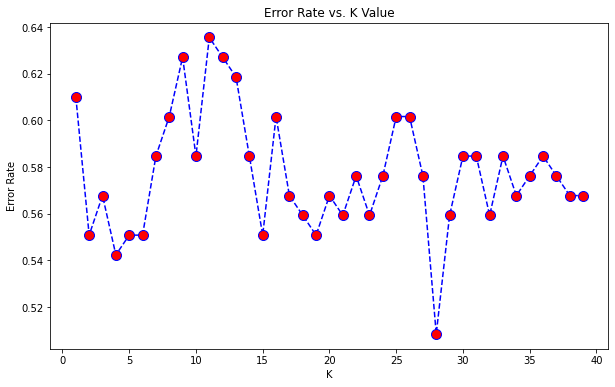

In [380]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [381]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[22 20  6]
 [17 25  6]
 [ 7  9  6]]


              precision    recall  f1-score   support

         1.0       0.48      0.46      0.47        48
         2.0       0.46      0.52      0.49        48
         3.0       0.33      0.27      0.30        22

    accuracy                           0.45       118
   macro avg       0.42      0.42      0.42       118
weighted avg       0.45      0.45      0.45       118



In [382]:
# classifying using decision trees algortighm

In [383]:
from sklearn.tree import DecisionTreeClassifier

In [384]:
dtree = DecisionTreeClassifier()

In [385]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [386]:
predictions = dtree.predict(X_test)

In [387]:
from sklearn.metrics import classification_report,confusion_matrix

In [388]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.50      0.42      0.45        48
         2.0       0.41      0.46      0.43        48
         3.0       0.33      0.36      0.35        22

    accuracy                           0.42       118
   macro avg       0.41      0.41      0.41       118
weighted avg       0.43      0.42      0.43       118



In [389]:
# classsifying using Random Forest algortighm

In [390]:
from sklearn.ensemble import RandomForestClassifier

In [391]:
rfc = RandomForestClassifier(n_estimators=600)

In [392]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [393]:
predictions = rfc.predict(X_test)

In [394]:
from sklearn.metrics import classification_report,confusion_matrix

In [395]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.67      0.42      0.51        48
         2.0       0.47      0.67      0.55        48
         3.0       0.25      0.23      0.24        22

    accuracy                           0.48       118
   macro avg       0.46      0.44      0.43       118
weighted avg       0.51      0.48      0.48       118



In [396]:
print(confusion_matrix(y_test,predictions))

[[20 21  7]
 [ 8 32  8]
 [ 2 15  5]]
